In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_csv("Dataset .csv")
print(df)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

In [3]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')


In [4]:
# Check for missing values
print(df.isnull().sum())

# Drop missing values
df.dropna(inplace=True)




Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


One-hot ncoding

In [5]:
# Identify 'Yes'/'No' columns
yes_no_columns = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']

# Convert 'Yes'/'No' to 1/0
for col in yes_no_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Identify other categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove 'Yes'/'No' columns from categorical columns since they are already converted
categorical_columns = [col for col in categorical_columns if col not in yes_no_columns]

# Apply One-Hot Encoding to the remaining categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)
df_encoded = df_encoded.astype(int)
print(df_encoded)


      Restaurant ID  Country Code  Longitude  Latitude  Average Cost for two  \
0           6317637           162        121        14                  1100   
1           6304287           162        121        14                  1200   
2           6300002           162        121        14                  4000   
3           6318506           162        121        14                  1500   
4           6314302           162        121        14                  1500   
...             ...           ...        ...       ...                   ...   
9546        5915730           208         28        41                    80   
9547        5908749           208         29        41                   105   
9548        5915807           208         29        41                   170   
9549        5916112           208         29        41                   120   
9550        5927402           208         29        40                    55   

      Has Table booking  Has Online del

splitting the dataset

In [6]:
# Assuming the target variable is 'Aggregate rating'
X = df_encoded.drop('Aggregate rating', axis=1)
y = df_encoded['Aggregate rating']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (7633, 20816)
X_test shape: (1909, 20816)
y_train shape: (7633,)
y_test shape: (1909,)


using random forest

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score, explained_variance_score, mean_squared_log_error

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Explained Variance Score: {evs}")
print(f"Mean Squared Logarithmic Error (MSLE): {msle}")



Mean Absolute Error (MAE): 0.14061812467260346
Mean Squared Error (MSE): 0.0851358826610791
Root Mean Squared Error (RMSE): 0.2917805385235265
R-squared (R²): 0.9538829796683774
Explained Variance Score: 0.9543812830873435
Mean Squared Logarithmic Error (MSLE): 0.007112844027945959


feature importance

In [8]:
# Using the feature importances from Random Forest
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Display the table
print(features_df)


                                                 Feature  Importance
20813                              Rating text_Not rated    0.336455
20808                                 Rating color_White    0.260794
10                                                 Votes    0.248828
20805                                 Rating color_Green    0.037663
20815                              Rating text_Very Good    0.034651
...                                                  ...         ...
7603   Address_1, Anangpur Chowk, Opposite Omaxe Fore...    0.000000
7601   Address_1, A Block Market, Shalimar Bagh, New ...    0.000000
7600   Address_1, A Block Market, Preet Vihar, New Delhi    0.000000
7599      Address_1 Rocklands Avenue, Balmoral, Auckland    0.000000
10408           Address_7275 S Main St., Helen, GA 30545    0.000000

[20816 rows x 2 columns]


In [9]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for col in categorical_cols:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

Column: Restaurant Name
Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
The Town House Cafe          1
The G.T. Road                1
The Darzi Bar & Kitchen      1
Smoke On Water               1
Walter's Coffee Roastery     1
Name: count, Length: 7437, dtype: int64


Column: City
City
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Lincoln              1
Lakeview             1
Lakes Entrance       1
Inverloch            1
Panchkula            1
Name: count, Length: 140, dtype: int64


Column: Address
Address
Dilli Haat, INA, New Delhi                                                   11
Sector 41, Noida                                                             11
Greater Kailash (GK) 1, New Delhi                                            10
T

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Select relevant columns for clustering
features = ['Cuisines', 'Price range', 'Locality']
X = df[features]

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Scale numerical features if necessary
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmean clutsering for clustering data based on selected features

In [11]:
# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Check for missing values and handle them
print("Missing values in the dataset:")
print(X.isnull().sum())


Missing values in the dataset:
Price range                                           0
Cuisines_Afghani                                      0
Cuisines_Afghani, Mughlai, Chinese                    0
Cuisines_Afghani, North Indian                        0
Cuisines_Afghani, North Indian, Pakistani, Arabian    0
                                                     ..
Locality_ibis New Delhi, Aerocity                     0
Locality_�ayyolu                                      0
Locality_�guas Claras                                 0
Locality_�ukurambar                                   0
Locality_��mitk�_y                                    0
Length: 3032, dtype: int64


In [12]:
# Perform K-means clustering
k = 10  # Number of clusters (adjust as needed)
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
df['cluster'] = clusters

# Print data types to debug
print("Data types in the dataframe after clustering:")
print(df.dtypes)

# Analyze cluster characteristics and feature importance
# Ensure numeric columns for mean calculation
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns for mean calculation:")
print(numeric_columns)

# Group by clusters and calculate the mean for numeric columns
cluster_means = df.groupby('cluster')[numeric_columns].mean()

print("Cluster Characteristics:")
print(cluster_means)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Data types in the dataframe after clustering:
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking         int64
Has Online delivery       int64
Is delivering now         int64
Switch to order menu      int64
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
cluster                   int32
dtype: object
Numeric columns for mean calculation:
Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price

content based filtering and restaurant recommendation


select relevant column

In [13]:
# Select relevant columns
df = df[['Restaurant Name', 'Cuisines', 'Price range', 'Aggregate rating', 'City']]

# Fill missing values and convert columns to strings
df['Cuisines'] = df['Cuisines'].fillna('')
df['Price range'] = df['Price range'].astype(str)
df['Aggregate rating'] = df['Aggregate rating'].astype(str)

# Combine features into a single string
df['combined_features'] = df['Cuisines'] + ' ' + df['Price range'] + ' ' + df['Aggregate rating']

<ipython-input-13-e6c8af9c462e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cuisines'] = df['Cuisines'].fillna('')
<ipython-input-13-e6c8af9c462e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price range'] = df['Price range'].astype(str)
<ipython-input-13-e6c8af9c462e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Vectorize the combined features
vectorizer = TfidfVectorizer()
feature_matrix = vectorizer.fit_transform(df['combined_features'])

# Calculate cosine similarity
cosine_sim = cosine_similarity(feature_matrix)


In [15]:
#fucntion to recommend restaurant
def get_recommendations(cuisine_pref, price_range_pref, min_rating, cosine_sim=cosine_sim):
    # Filter the dataframe based on user preferences
    filtered_df = df[(df['Cuisines'].str.contains(cuisine_pref)) &
                     (df['Price range'] == str(price_range_pref)) &
                     (df['Aggregate rating'].astype(float) >= min_rating)]

    if filtered_df.empty:
        return "No restaurants match the given preferences."

    idx = filtered_df.index
    sim_scores = list(enumerate(cosine_sim[idx[0]]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # Get top 5 similar restaurants
    restaurant_indices = [i[0] for i in sim_scores]
    return df['Restaurant Name'].iloc[restaurant_indices]

test input

In [21]:
# Test the recommendation system with sample user preferences
sample_cuisine = input(" enter cuisine ")
sample_price_range = int(input(" enter price range "))
sample_min_rating = float(input("enter rating "))
recommended_restaurants = get_recommendations(sample_cuisine, sample_price_range, sample_min_rating)

print(f"Restaurants matching the preferences (Cuisine: {sample_cuisine}, Price Range: {sample_price_range}, Minimum Rating: {sample_min_rating}):")
print(recommended_restaurants)

 enter cuisine Italian
 enter price range 3
enter rating 4
Restaurants matching the preferences (Cuisine: Italian, Price Range: 3, Minimum Rating: 4.0):
62          Cantina Famiglia Mancini
100                    Villa Gargano
146    Flatbread Neapolitan Pizzeria
166     Biaggi's Ristorante Italiano
201                         Deorio's
Name: Restaurant Name, dtype: object


classification of restaurants in the basis of cuisines

In [39]:
print(df.columns)

Index(['Restaurant Name', 'Cuisines', 'Aggregate rating', 'combined_features',
       'Cuisines_encoded', 'City_Abu Dhabi', 'City_Agra', 'City_Ahmedabad',
       'City_Albany', 'City_Allahabad',
       ...
       'City_Waterloo', 'City_Weirton', 'City_Wellington City',
       'City_Winchester Bay', 'City_Yorkton', 'City_��stanbul',
       'Price range_1', 'Price range_2', 'Price range_3', 'Price range_4'],
      dtype='object', length=149)


In [40]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(['Restaurant Name', 'Cuisines', 'Cuisines_encoded', 'combined_features'], axis=1)
y = df['Cuisines_encoded']

# Check if all features are numeric
print(X.dtypes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Aggregate rating    object
City_Abu Dhabi        bool
City_Agra             bool
City_Ahmedabad        bool
City_Albany           bool
                     ...  
City_��stanbul        bool
Price range_1         bool
Price range_2         bool
Price range_3         bool
Price range_4         bool
Length: 145, dtype: object


In [24]:
# Define features and target variable
X = df.drop(['Restaurant Name', 'Cuisines', 'Cuisines_encoded'], axis=1)
y = df['Cuisines_encoded']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Train a Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Specify labels manually
labels = np.unique(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")


# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame for easier manipulation
report_df = pd.DataFrame(report).transpose()

# Display only precision, recall, f1-score, and support for each cuisine
metrics_df = report_df[['precision', 'recall', 'f1-score', 'support']]

# Display the table
print("Classification Metrics by Cuisine:")
print(metrics_df)



Accuracy: 0.09900471451021477
Classification Metrics by Cuisine:
              precision    recall  f1-score      support
1              0.000000  0.000000  0.000000     1.000000
6              0.000000  0.000000  0.000000     3.000000
7              0.000000  0.000000  0.000000     0.000000
8              0.000000  0.000000  0.000000     0.000000
9              0.000000  0.000000  0.000000     0.000000
...                 ...       ...       ...          ...
1823           0.000000  0.000000  0.000000     1.000000
1824           0.000000  0.000000  0.000000     0.000000
accuracy       0.099005  0.099005  0.099005     0.099005
macro avg      0.006796  0.007106  0.006218  1909.000000
weighted avg   0.045879  0.099005  0.056109  1909.000000

[731 rows x 4 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

task 4


The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python.Basemap does not plot on its own, but provides the facilities to transform coordinates to one of 25 different map projections (using pyproj and therefore the PROJ C library).

In [45]:
pip install matplotlib basemap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


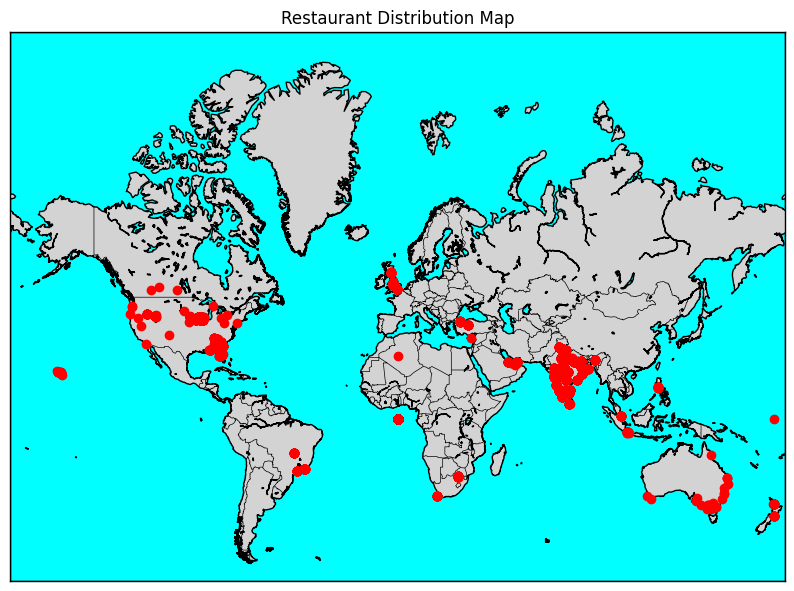

In [6]:
df = pd.read_csv("Dataset .csv")

# Create a new figure
plt.figure(figsize=(10, 8))

# Create Basemap instance
m = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=85, llcrnrlon=-180, urcrnrlon=180, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray', lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

# Plot restaurant locations
x, y = m(df['Longitude'].values, df['Latitude'].values)
m.scatter(x, y, marker='o', color='red', zorder=5)

# Add title
plt.title('Restaurant Distribution Map')

# Show the plot
plt.show()


In [20]:
# Group by City or Locality and count restaurants
restaurant_counts = df.groupby('City')['Restaurant Name'].count().reset_index()
restaurant_counts = restaurant_counts.rename(columns={'Restaurant Name': 'Restaurant Count'})
# Filter out cities with zero restaurants
restaurant_counts = restaurant_counts[restaurant_counts['Restaurant Count'] > 0]
# Sort by restaurant count (optional)
restaurant_counts = restaurant_counts.sort_values(by='Restaurant Count', ascending=False)

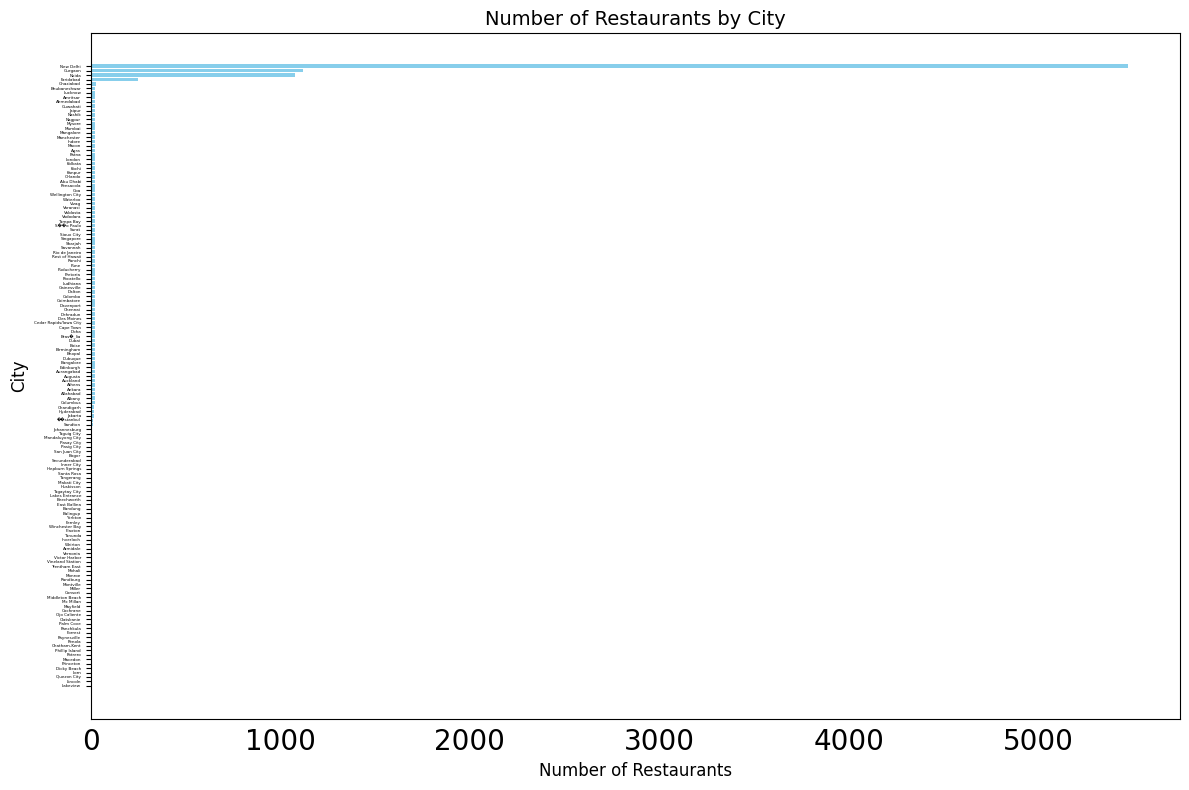

In [21]:
# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(restaurant_counts['City'], restaurant_counts['Restaurant Count'], color='skyblue')

# Adding labels and annotations
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.title('Number of Restaurants by City', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to display cities with highest count on top

# Adjusting ticks and labels
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=3)
plt.tight_layout()

# Remove x-axis ticks
plt.tick_params(axis='x', which='both', bottom=False, top=False)

plt.show()

In [25]:
#Calculate average ratings and unique cuisines by city
stats_by_city = df.groupby('City').agg({
    'Aggregate rating': 'mean',                   # Calculate average rating
    'Cuisines': lambda x: x.nunique(),   # Count unique cuisines
    'Price range': lambda x: x.mode().iloc[0] if not x.empty else None  # Most common price range
}).reset_index()

# Rename columns for clarity
stats_by_city.columns = ['City', 'Average Rating', 'Unique Cuisines', 'Most Common Price Range']

# Display the statistics
print("Statistics by City or Locality:")
print(stats_by_city)

Statistics by City or Locality:
                City  Average Rating  Unique Cuisines  Most Common Price Range
0          Abu Dhabi        4.300000               17                        4
1               Agra        3.965000               15                        2
2          Ahmedabad        4.161905               21                        3
3             Albany        3.555000               16                        1
4          Allahabad        3.395000               18                        3
..               ...             ...              ...                      ...
136          Weirton        3.900000                1                        2
137  Wellington City        4.250000               17                        4
138   Winchester Bay        3.200000                1                        2
139          Yorkton        3.300000                1                        2
140        ��stanbul        4.292857               11                        3

[141 rows x 4 colum

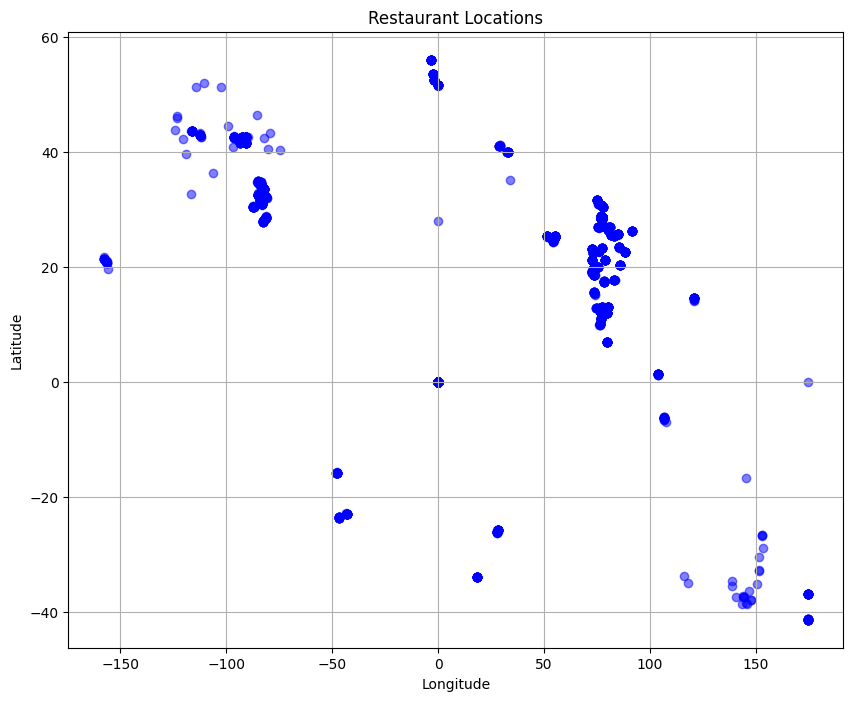

Top Cities by Unique Cuisines:
City
New Delhi     892
Gurgaon       362
Noida         248
Faridabad      87
Ahmedabad      21
Coimbatore     20
Jaipur         20
Sharjah        20
Des Moines     20
Colombo        20
Name: Cuisines, dtype: int64

Top Cities by Average Rating:
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Tagaytay City       4.500000
Secunderabad        4.500000
Name: Aggregate rating, dtype: float64

Most Famous Cuisines Globally:
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street 

In [31]:
#Plotting restaurant locations on a map
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], marker='o', color='blue', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Restaurant Locations')
plt.grid(True)
plt.show()

# Example: Analyzing cuisine popularity by city
cuisine_counts = df.groupby('City')['Cuisines'].nunique().sort_values(ascending=False).head(10)
print("Top Cities by Unique Cuisines:")
print(cuisine_counts)

# Example: Analyzing average ratings by city
average_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
print("\nTop Cities by Average Rating:")
print(average_ratings)

# Example: Calculate most famous cuisines globally
global_cuisine_counts = df['Cuisines'].value_counts().head(10)
print("\nMost Famous Cuisines Globally:")
print(global_cuisine_counts)

# Example: Calculate most famous cuisines by city
city_cuisine_counts = df.groupby('City')['Cuisines'].value_counts().groupby('City').head(1)
print("\nMost Famous Cuisines by City:")
print(city_cuisine_counts)